#이미지 불러오기 및 데이터 변환

In [ ]:
#rasterio 설치

In [ ]:
pip install rasterio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#분석에 필요한 패키지 load
import numpy as np
import os.path
import matplotlib.pyplot as plt
import rasterio
from rasterio.plot import show

In [ ]:
#이미지 파일 이름 지정 및 불러오기
fname_img = "사용자료_식생_1700.1550.png"

In [ ]:
!gdown --id 1pA4bIDVWyo9hYVuLPX8zMmuoC4cd1QFy

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1pA4bIDVWyo9hYVuLPX8zMmuoC4cd1QFy
To: /content/사용자료_식생_1700.1550.png
100% 5.65M/5.65M [00:00<00:00, 166MB/s]


In [ ]:
#파일인식 확인
os.path.isfile(fname_img)

True

In [ ]:
img = rasterio.open(fname_img)

/usr/local/lib/python3.8/dist-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


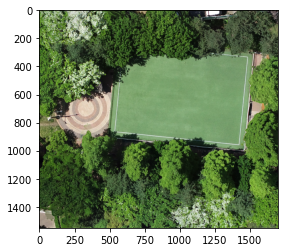

In [ ]:
show(img)

In [ ]:
#기존 데이터 array형태로 변환
type(img)

rasterio.io.DatasetReader

In [ ]:
I = img.read()

In [ ]:
type(I)

numpy.ndarray

In [ ]:
#band, dimension 확인, 위치변환
I.shape

(4, 1550, 1700)

In [ ]:
I = np.swapaxes(I, 0, 2)

In [ ]:
I.shape

(1700, 1550, 4)

In [ ]:
I

array([[[219, 249, 219, 255],
        [219, 244, 211, 255],
        [216, 241, 204, 255],
        ...,
        [ 16,  16,  16, 255],
        [ 15,  16,  16, 255],
        [ 15,  16,  17, 255]],

       [[211, 242, 203, 255],
        [214, 242, 204, 255],
        [207, 232, 197, 255],
        ...,
        [ 15,  16,  16, 255],
        [ 15,  16,  16, 255],
        [ 16,  17,  17, 255]],

       [[204, 234, 196, 255],
        [208, 237, 192, 255],
        [191, 220, 171, 255],
        ...,
        [ 15,  16,  17, 255],
        [ 16,  17,  17, 255],
        [ 17,  18,  18, 255]],

       ...,

       [[ 53,  44,  39, 255],
        [ 80,  69,  63, 255],
        [105,  94,  89, 255],
        ...,
        [ 94, 135,  51, 255],
        [ 95, 128,  53, 255],
        [ 86, 113,  48, 255]],

       [[ 55,  45,  42, 255],
        [ 75,  64,  61, 255],
        [ 96,  86,  82, 255],
        ...,
        [ 84, 128,  48, 255],
        [ 83, 118,  48, 255],
        [ 73, 100,  42, 255]],

       [[ 66

In [ ]:
#불필요한 축 제거
I3 = np.delete(I,3,axis=2)

In [ ]:
I3.shape

(1700, 1550, 3)

In [ ]:
#한줄로 펴기, 화소 나열 위치 확인
X = I3.reshape((1700*1550, 3))

In [ ]:
X.shape

(2635000, 3)

In [ ]:
I3[0,1, :]

array([219, 244, 211], dtype=uint8)

In [ ]:
X[1, :]

array([219, 244, 211], dtype=uint8)

In [ ]:
I3[1, 0, :]

array([211, 242, 203], dtype=uint8)

In [ ]:
X[1550, :]

array([211, 242, 203], dtype=uint8)

#PCA 실행

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(X)

PCA(n_components=3)

In [ ]:
print(pca.components_)

[[ 0.58378185  0.62472985  0.51856664]
 [ 0.0802234  -0.67995786  0.72884944]
 [ 0.80793747 -0.38388789 -0.44706501]]


In [ ]:
x1 = pca.components_[:,0]
x2 = pca.components_[:,1]
np.dot(x1, x1)

0.9999999999999999

In [ ]:
np.dot(x1, x2)

-5.551115123125783e-17

In [ ]:
print(pca.explained_variance_)

[8124.21488112  335.24908147   71.22204437]


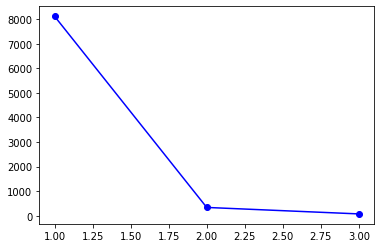

In [ ]:
plt.plot(np.arange(3)+1, pca.explained_variance_, 'bo-')

In [ ]:
X_pca = pca.transform(X)

In [ ]:
X_pca.shape

(2635000, 3)

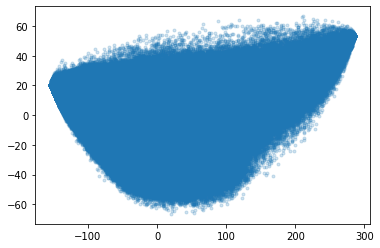

In [ ]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], marker='.', alpha=0.2)

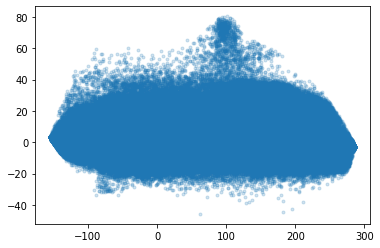

In [ ]:
plt.scatter(X_pca[:, 0], X_pca[:, 2], marker='.', alpha=0.2)

In [ ]:
I_pca = X_pca.reshape(1700, 1550, 3)

In [ ]:
I_pca = np.swapaxes(I_pca, 0, 1)

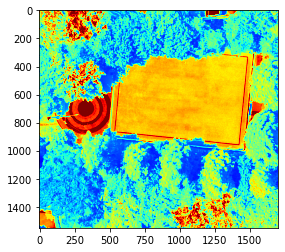

In [ ]:
plt.imshow(I_pca[:,:,0], cmap='jet', vmin=-200, vmax=200)
plt.show()

첫번째 주성분에 해당하는 변환화소 영상입니다. 지표에 해당하는 부분은 매우 밝은 값(빨강)으로 나타나고, 나무와 같은 식생은 낮은 값(파랑)으로 나타납니다. 이 첫번째 주성분영상은 지면/식생 구분 영상이라 할 수 있습니다.

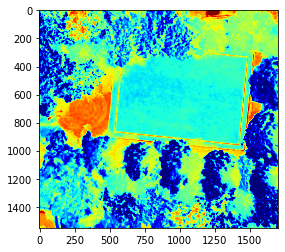

In [ ]:
plt.imshow(I_pca[:,:,1], cmap='jet', vmin=-30, vmax=50)
plt.show()

두번째 주성분에 해당하는 변환화소 영상입니다. 높은 값이 주요 식생에 나타나고 낮은 값들로 고도가 낮은 식생 및 지면을 표시하고 있습니다.

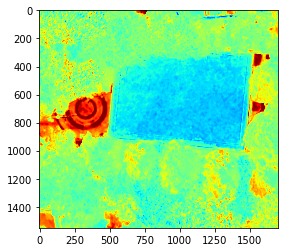

In [ ]:
plt.imshow(I_pca[:,:,2], cmap='jet', vmin=-30, vmax=30)
plt.show()

마지막 주성분에 해당하는 변환화소 영상입니다. 위 영상은 극명하게 식생(인공잔디를 포함한)과 식생이 아닌 지면이 나뉘는 것을 확인할 수 있는 영상이었습니다.

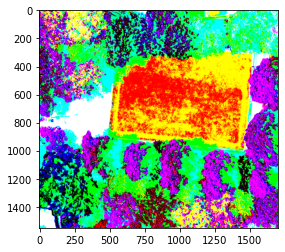

In [ ]:
plt.imshow(I_pca)
plt.show()

각각의 주성분 영상에 각각 R,G,B를 할당해서 RGB영상으로 만든 결과물입니다.

가장 밝은 값(흰색)으로 인공지면을, 다음 밝은 값으로 인공잔디와 꽃을, 나머지 다른 중간 값으로 나무를 구분하고, 같은 종의 나무 상부라고 하더라도 음영애 따라 색깔로 구별되는 것을 확인하였습니다.